# Reconhecimento de Gestos em LIBRAS

Este notebook tem como objetivo o uso de técnicas de machine learning para o reconhecimento de gestos da língua de sinais brasileira (LIBRAS).

Conseguir identificar os sinais pode ser útil num contexto de inclusão de pessoas com deficiência auditiva, oferecendo uma ferramenta que permite a tradução automática de gestos em Libras para texto ou fala.

## Etapas

1.   Baixar o dataset que servirá de treino e teste para o modelo.
2.   Treinar nosso modelo.



## Etapa 1 - Baixando o dataset

Nesta etapa, baixamos o conjunto de dados "Libras (Brazilian Sign Language)" do Kaggle, que contém imagens de sinais da língua brasileira de sinais (LIBRAS). Para baixar o conjunto de dados, usamos os seguintes comandos:

1.   Instalar o pacote do Kaggle, que permite acessar a API do Kaggle diretamente do notebook do Colab.
2.   Fazer o upload do arquivo kaggle.json para o Google Colab. Para fazer isso, você tem que:
- Vá para a página de configurações da sua conta no Kaggle (https://www.kaggle.com/[seu_username]/account).
- Role a página até a seção "API" e clique no botão "Create New API Token". Isso irá baixar um arquivo chamado kaggle.json para o seu computador.
- No Google Colab, clique no ícone de pasta no painel esquerdo para abrir o navegador de arquivos.
- Clique no botão "Upload" e selecione o arquivo kaggle.json que você acabou de baixar.
- Após o upload ser concluído, use o comando da célula [5] para copiar o arquivo para o diretório .kaggle na raiz do seu ambiente do Colab.
- Execute o comando da célula [6] para definir as permissões corretas para o arquivo kaggle.json.
3. Baixar o dataset de LIBRAS.
4. Descompactar o arquivo libras.zip.






In [ ]:
# instalar o pacote do Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
# definir permissões para o arquivo
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# baixar o dataset
! kaggle datasets download -d williansoliveira/libras

libras.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extrair os arquivos
! unzip libras.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train/U/953.png         
  inflating: train/U/954.png         
  inflating: train/U/955.png         
  inflating: train/U/956.png         
  inflating: train/U/957.png         
  inflating: train/U/958.png         
  inflating: train/U/959.png         
  inflating: train/U/96.png          
  inflating: train/U/960.png         
  inflating: train/U/961.png         
  inflating: train/U/962.png         
  inflating: train/U/963.png         
  inflating: train/U/964.png         
  inflating: train/U/965.png         
  inflating: train/U/966.png         
  inflating: train/U/967.png         
  inflating: train/U/968.png         
  inflating: train/U/969.png         
  inflating: train/U/97.png          
  inflating: train/U/970.png         
  inflating: train/U/971.png         
  inflating: train/U/972.png         
  inflating: train/U/973.png         
  inflating: train/U/974.png         
  inflating: train/U/975.png 

## Etapa 2 - Treinar nosso modelo

Nesta etapa, vamos realizar o treinamento de um modelo de reconhecimento de sinais de LIBRAS utilizando a arquitetura resnet18, que é uma rede neural pré-treinada. O objetivo é adaptar essa rede neural já treinada para uma nova tarefa específica, que é a classificação de letras em LIBRAS.

Utilizaremos também a biblioteca fastai, que fornece ferramentas para facilitar o treinamento de modelos de aprendizado de máquina. E até porque esta é uma lição do curso do fastai, então faz sentido usar a biblioteca deles.

Ao final do processo de treinamento, iremos verificar se o modelo está adequado para o problema proposto, utilizando o conjunto de dados de teste para avaliar o desempenho da rede neural.

In [ ]:
# instalar dependencias
! pip install -Uqq fastai
! pip install -Uqq fastbook

In [135]:
from fastai.vision.all import *
from fastbook import *

path = Path('test')
letras = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = letras.dataloaders(path)

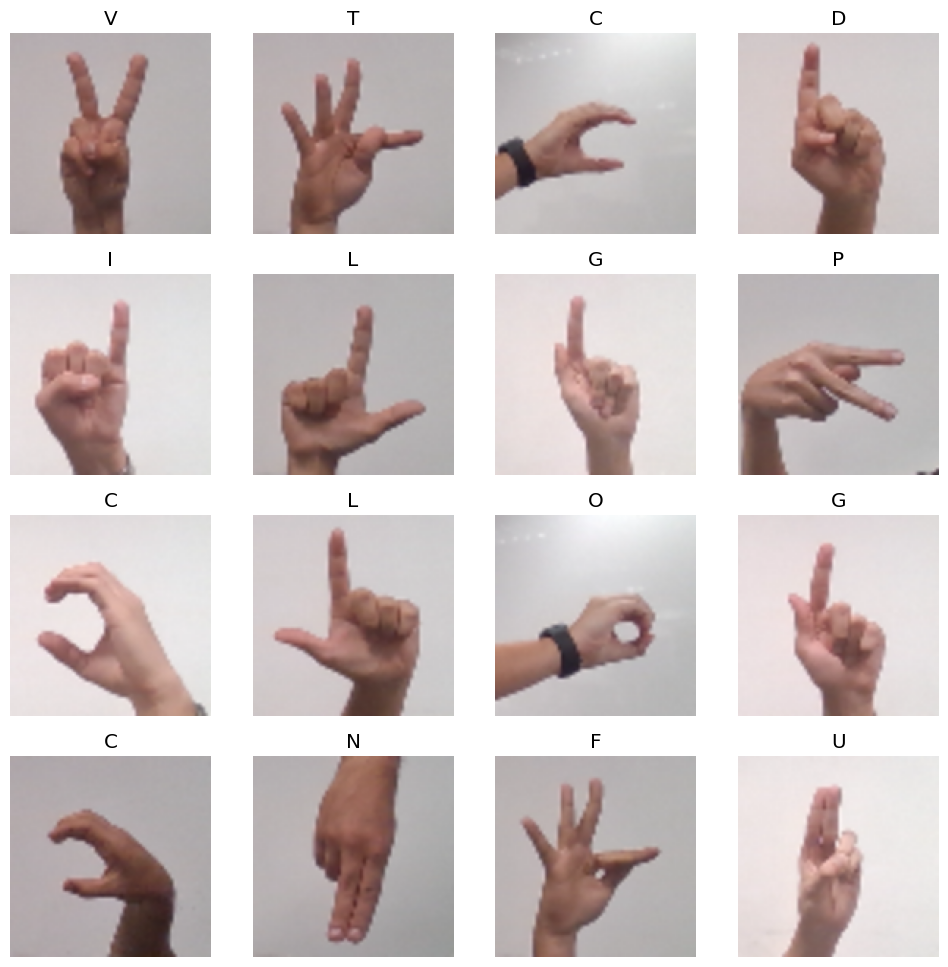

In [136]:
dls.show_batch(max_n=16, nrows=4)

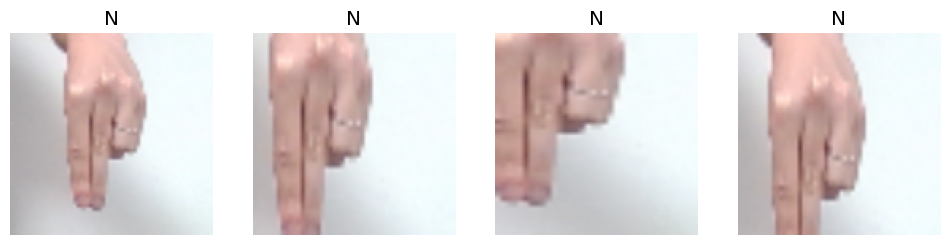

In [137]:
letras = letras.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = letras.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

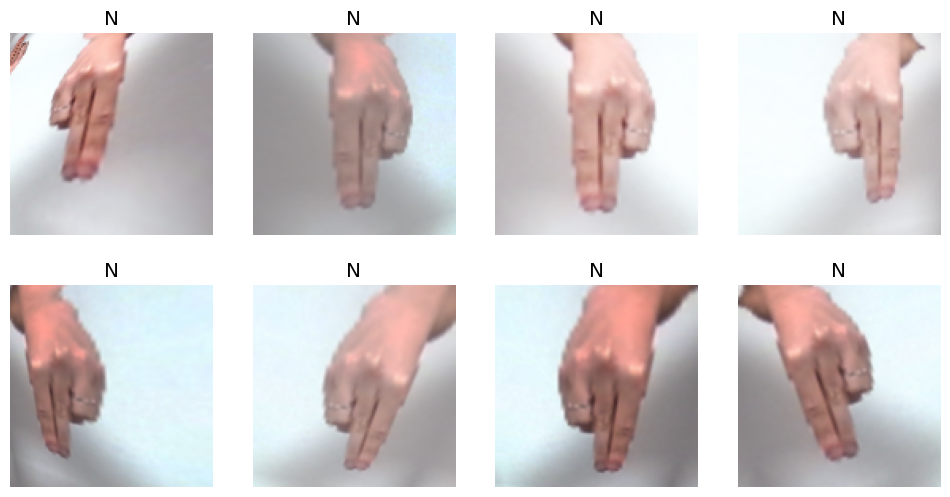

In [138]:
letras = letras.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = letras.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [139]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Agora vamos verificar quais os principais erros.
Sabendo quais as letras que o programa está tendo dificuldade de reconhecer, podemos aumentar o número de caso de treinamentos, ou apresentar de diversas outras maneiras, para treinar melhor nossa rede neural.

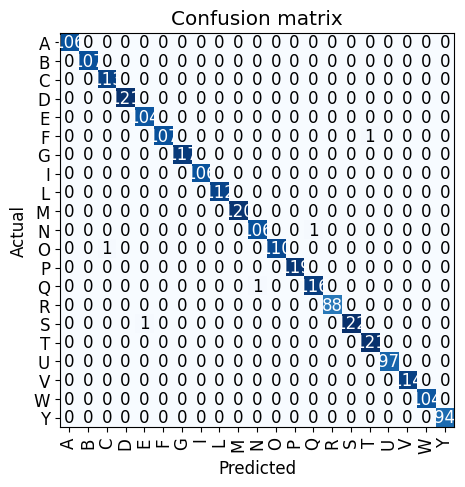

In [140]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

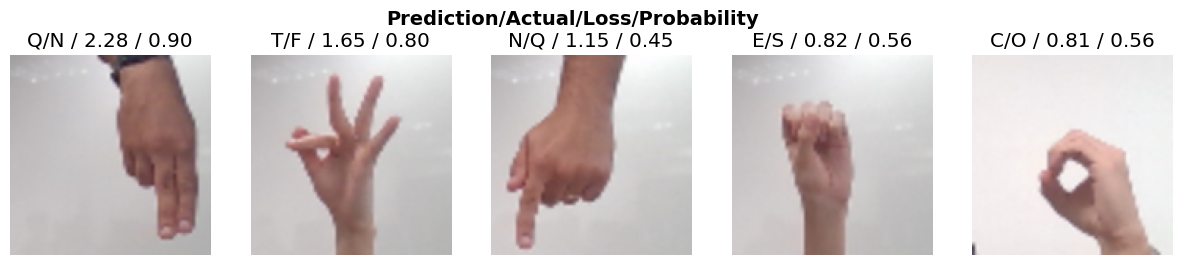

In [141]:
interp.plot_top_losses(5, nrows=1)

ImageClassifierCleaner permite visualizar e limpar imagens classificadas incorretamente pelo modelo. 

Com o cleaner, você pode visualizar as imagens classificadas incorretamente, e então decidir se quer excluí-las ou movê-las para outro diretório. 

In [142]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## Aplicação Web

Agora, por último, criamos uma aplicação web com esse modelo.

In [143]:
learn.export('model.pkl')

Pode ser encontrado no link: https://huggingface.co/spaces/klmurussi/lesson2

## Referências
https://course.fast.ai/Lessons/lesson2.html

https://github.com/fastai/fastbook/blob/master/02_production.ipynb

https://www.kaggle.com/datasets/williansoliveira/libras?resource=download&select=train